In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

[Información sobre el dataset de Vinos](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset)

In [2]:
# Veamos el dataset de vinos
wine_info = load_wine()
X = pd.DataFrame(wine_info.data, columns=wine_info.feature_names)
y = pd.Categorical.from_codes(wine_info.target, wine_info.target_names)
X.shape #178 datos y 13 variables

(178, 13)

In [3]:
X.head() 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
# Categorías: 3
y

['class_0', 'class_0', 'class_0', 'class_0', 'class_0', ..., 'class_2', 'class_2', 'class_2', 'class_2', 'class_2']
Length: 178
Categories (3, object): ['class_0', 'class_1', 'class_2']

In [6]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
X_lda = lda_model.fit_transform(X, y)

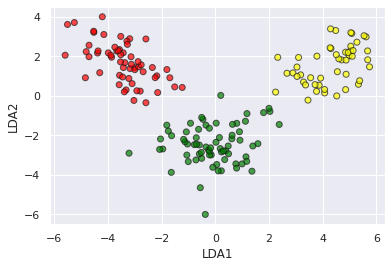

In [7]:
colors = {'class_0':'red', 'class_1':'green', 'class_2':'yellow'}

plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.scatter(
X_lda[:,0],
X_lda[:,1],
   c=y.map(colors),
   alpha=0.7,
edgecolors='k'
)

In [ ]:
X_lda

array([[-4.7002,  1.9791],
       [-4.302 ,  1.1704],
       [-3.4207,  1.4291],
       [-4.2058,  4.0029],
       [-1.51  ,  0.4512],
       [-4.5187,  3.2131],
       [-4.5274,  3.2691],
       [-4.1483,  3.1041],
       [-3.8608,  1.9534],
       [-3.3666,  1.6786],
       [-4.8059,  2.2354],
       [-3.4281,  2.1751],
       [-3.6661,  2.2625],
       [-5.5882,  2.0548],
       [-5.5013,  3.613 ],
       [-3.1848,  2.8895],
       [-3.2894,  2.7658],
       [-2.9981,  1.4251],
       [-5.2464,  3.7098],
       [-3.1365,  1.9769],
       [-3.5775,  0.5625],
       [-1.6908,  0.9134],
       [-4.8352,  0.9148],
       [-3.0959,  0.6174],
       [-3.3216,  0.2985],
       [-2.1448,  0.1637],
       [-3.9824,  2.1752],
       [-2.6859,  1.2185],
       [-3.5631,  1.0382],
       [-3.173 ,  1.3779],
       [-2.9963,  1.3242],
       [-3.5687,  2.3407],
       [-3.3851,  0.2012],
       [-3.5275,  1.7159],
       [-2.8519,  1.4707],
       [-2.7941,  0.2379],
       [-2.7581,  1.5697],
 

In [8]:
# Train - Test split para construir un clasificador
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=1)

In [9]:
# Clasificador Decision Tree usando la transformación de LDA:
data = DecisionTreeClassifier()
data.fit(X_train, y_train)
y_pred = data.predict(X_test)
confusion_matrix(y_test, y_pred) # Clasifica correctamente todos los datos en el conjunto de prueba.

array([[18,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 10]])

In [10]:
# Clasificador Decision Tree sin usar la transformación de LDA:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
data = DecisionTreeClassifier()
data.fit(X_train, y_train)
y_pred = data.predict(X_test)
confusion_matrix(y_test, y_pred) # Clasifica incorrectamente algunos datos en el conjunto de prueba, usar LDA es mejor.

array([[18,  0,  0],
       [ 1, 15,  1],
       [ 0,  0, 10]])

In [45]:
# Clasificador directo
X_ldafit = lda_model.fit(X_train, y_train)
y_pred = X_ldafit.predict(X_test)
confusion_matrix(y_test, y_pred) # Clasifica correctamente todos los datos en el conjunto de prueba.

array([[18,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 10]])